### First we will import all the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orgData = pd.read_csv('survey_results_public.csv',index_col='Respondent')

In [3]:
orgData.head()

MainBranch Hobbyist   Age  \
Respondent                                                                     
1                              I am a developer by profession      Yes   NaN   
2                              I am a developer by profession       No   NaN   
3                                 I code primarily as a hobby      Yes   NaN   
4                              I am a developer by profession      Yes  25.0   
5           I used to be a developer by profession, but no...      Yes  31.0   

           Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
Respondent                                                                     
1                  13  Monthly        NaN            NaN             Germany   
2                  19      NaN        NaN            NaN      United Kingdom   
3                  15      NaN        NaN            NaN  Russian Federation   
4                  18      NaN        NaN            NaN             Albania   
5                  16      NaN        NaN            NaN       United States   

              CurrencyDesc CurrencySymbol  ...                  SurveyEase  \
Respondent                                 ...                               
1            European Euro            EUR  ...  Neither easy nor difficult   
2           Pound sterling            GBP  ...                         NaN   
3                      NaN            NaN  ...  Neither easy nor difficult   
4             Albanian lek            ALL  ...                         NaN   
5                      NaN            NaN  ...                        Easy   

                     SurveyLength Trans  \
Respondent                                
1           Appropriate in length    No   
2                             NaN   NaN   
3           Appropriate in length   NaN   
4                             NaN    No   
5                       Too short    No   

                                               UndergradMajor  \
Respondent                                                      
1           Computer science, computer engineering, or sof...   
2           Computer science, computer engineering, or sof...   
3                                                         NaN   
4           Computer science, computer engineering, or sof...   
5           Computer science, computer engineering, or sof...   

           WebframeDesireNextYear    WebframeWorkedWith  \
Respondent                                                
1                    ASP.NET Core  ASP.NET;ASP.NET Core   
2                             NaN                   NaN   
3                             NaN                   NaN   
4                             NaN                   NaN   
5            Django;Ruby on Rails         Ruby on Rails   

                                       WelcomeChange WorkWeekHrs YearsCode  \
Respondent                                                                   
1            Just as welcome now as I felt last year        50.0        36   
2           Somewhat more welcome now than last year         NaN         7   
3           Somewhat more welcome now than last year         NaN         4   
4           Somewhat less welcome now than last year        40.0         7   
5            Just as welcome now as I felt last year         NaN        15   

           YearsCodePro  
Respondent               
1                    27  
2                     4  
3                   NaN  
4                     4  
5                     8  

[5 rows x 60 columns]

In [4]:
orgData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64461 entries, 1 to 65112
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MainBranch                    64162 non-null  object 
 1   Hobbyist                      64416 non-null  object 
 2   Age                           45446 non-null  float64
 3   Age1stCode                    57900 non-null  object 
 4   CompFreq                      40069 non-null  object 
 5   CompTotal                     34826 non-null  float64
 6   ConvertedComp                 34756 non-null  float64
 7   Country                       64072 non-null  object 
 8   CurrencyDesc                  45472 non-null  object 
 9   CurrencySymbol                45472 non-null  object 
 10  DatabaseDesireNextYear        44070 non-null  object 
 11  DatabaseWorkedWith            49537 non-null  object 
 12  DevType                       49370 non-null  object 
 13  E

In [5]:
for i in orgData.columns:
    print('No of unique values in column ',i,' is ',np.count_nonzero(orgData[i].unique()))

No of unique values in column  MainBranch  is  6
No of unique values in column  Hobbyist  is  3
No of unique values in column  Age  is  111
No of unique values in column  Age1stCode  is  64
No of unique values in column  CompFreq  is  4
No of unique values in column  CompTotal  is  3003
No of unique values in column  ConvertedComp  is  6958
No of unique values in column  Country  is  184
No of unique values in column  CurrencyDesc  is  143
No of unique values in column  CurrencySymbol  is  142
No of unique values in column  DatabaseDesireNextYear  is  3194
No of unique values in column  DatabaseWorkedWith  is  2809
No of unique values in column  DevType  is  8270
No of unique values in column  EdLevel  is  10
No of unique values in column  Employment  is  8
No of unique values in column  Ethnicity  is  209
No of unique values in column  Gender  is  8
No of unique values in column  JobFactors  is  231
No of unique values in column  JobSat  is  6
No of unique values in column  JobSeek  i

<AxesSubplot:>

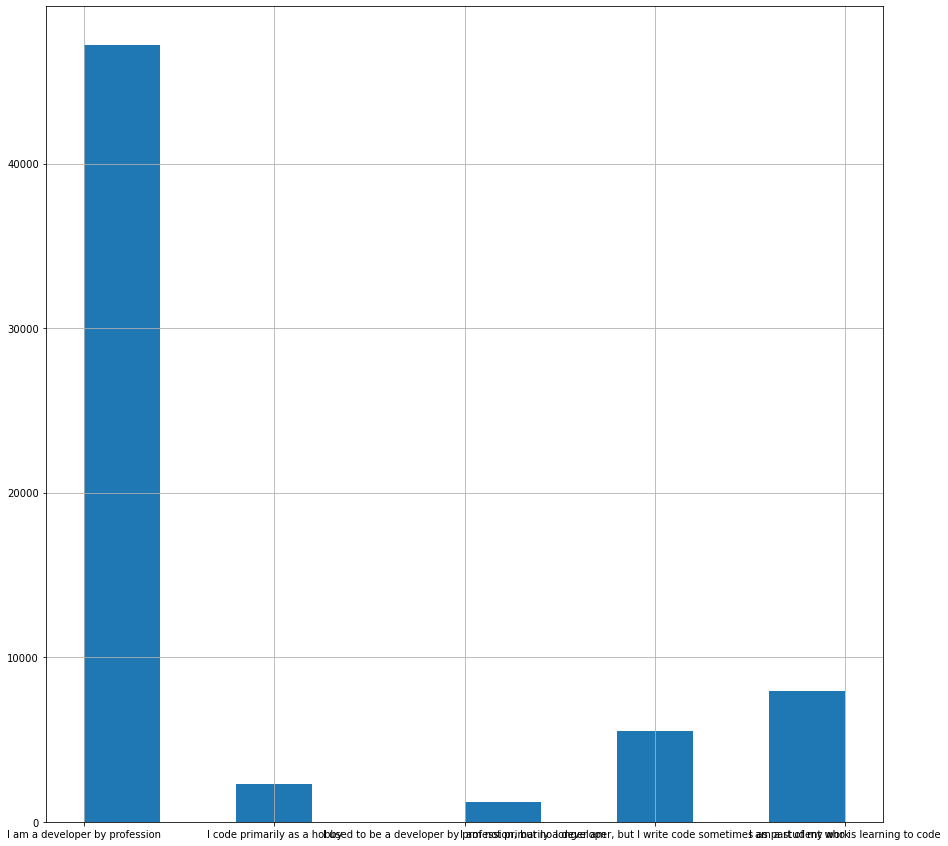

In [6]:
orgData['MainBranch'].hist(figsize=(15,15))

In [7]:
print(orgData['MainBranch'].value_counts())

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64


In [8]:
def createTarget(row):
    devops = 0
    if(row == 'I am a developer by profession'):
        devops = 1
    return devops

orgData['Target'] = orgData['MainBranch'].apply(lambda x : createTarget(x))

In [9]:
orgData['Target']

Respondent
1        1
2        1
3        0
4        1
5        0
        ..
64858    0
64867    0
64898    0
64925    0
65112    0
Name: Target, Length: 64461, dtype: int64

In [10]:
total = orgData.isnull().sum().sort_values(ascending=False)
percent = ((orgData.isnull().sum()/orgData.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(len(orgData.columns)))

                        Total    Percent
ConvertedComp           29705  46.082127
CompTotal               29635  45.973534
NEWPurchaseResearch     27140  42.102977
PurchaseWhat            25097  38.933619
WebframeDesireNextYear  24437  37.909744
...                       ...        ...
Employment                607   0.941655
Country                   389   0.603466
MainBranch                299   0.463846
Hobbyist                   45   0.069810
Target                      0   0.000000

[61 rows x 2 columns]


In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [11]:
missing_data.head(len(orgData.columns))

Total    Percent
ConvertedComp           29705  46.082127
CompTotal               29635  45.973534
NEWPurchaseResearch     27140  42.102977
PurchaseWhat            25097  38.933619
WebframeDesireNextYear  24437  37.909744
...                       ...        ...
Employment                607   0.941655
Country                   389   0.603466
MainBranch                299   0.463846
Hobbyist                   45   0.069810
Target                      0   0.000000

[61 rows x 2 columns]

In [12]:
master_data_copy = orgData.copy()
master_data_copy.head()

MainBranch Hobbyist   Age  \
Respondent                                                                     
1                              I am a developer by profession      Yes   NaN   
2                              I am a developer by profession       No   NaN   
3                                 I code primarily as a hobby      Yes   NaN   
4                              I am a developer by profession      Yes  25.0   
5           I used to be a developer by profession, but no...      Yes  31.0   

           Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
Respondent                                                                     
1                  13  Monthly        NaN            NaN             Germany   
2                  19      NaN        NaN            NaN      United Kingdom   
3                  15      NaN        NaN            NaN  Russian Federation   
4                  18      NaN        NaN            NaN             Albania   
5                  16      NaN        NaN            NaN       United States   

              CurrencyDesc CurrencySymbol  ...           SurveyLength Trans  \
Respondent                                 ...                                
1            European Euro            EUR  ...  Appropriate in length    No   
2           Pound sterling            GBP  ...                    NaN   NaN   
3                      NaN            NaN  ...  Appropriate in length   NaN   
4             Albanian lek            ALL  ...                    NaN    No   
5                      NaN            NaN  ...              Too short    No   

                                               UndergradMajor  \
Respondent                                                      
1           Computer science, computer engineering, or sof...   
2           Computer science, computer engineering, or sof...   
3                                                         NaN   
4           Computer science, computer engineering, or sof...   
5           Computer science, computer engineering, or sof...   

           WebframeDesireNextYear    WebframeWorkedWith  \
Respondent                                                
1                    ASP.NET Core  ASP.NET;ASP.NET Core   
2                             NaN                   NaN   
3                             NaN                   NaN   
4                             NaN                   NaN   
5            Django;Ruby on Rails         Ruby on Rails   

                                       WelcomeChange WorkWeekHrs YearsCode  \
Respondent                                                                   
1            Just as welcome now as I felt last year        50.0        36   
2           Somewhat more welcome now than last year         NaN         7   
3           Somewhat more welcome now than last year         NaN         4   
4           Somewhat less welcome now than last year        40.0         7   
5            Just as welcome now as I felt last year         NaN        15   

           YearsCodePro Target  
Respondent                      
1                    27      1  
2                     4      1  
3                   NaN      0  
4                     4      1  
5                     8      0  

[5 rows x 61 columns]

In [13]:
master_data_copy.drop(['MainBranch'],axis=1,inplace=True)

In [14]:
master_data_copy.head()

Hobbyist   Age Age1stCode CompFreq  CompTotal  ConvertedComp  \
Respondent                                                                
1               Yes   NaN         13  Monthly        NaN            NaN   
2                No   NaN         19      NaN        NaN            NaN   
3               Yes   NaN         15      NaN        NaN            NaN   
4               Yes  25.0         18      NaN        NaN            NaN   
5               Yes  31.0         16      NaN        NaN            NaN   

                       Country    CurrencyDesc CurrencySymbol  \
Respondent                                                      
1                      Germany   European Euro            EUR   
2               United Kingdom  Pound sterling            GBP   
3           Russian Federation             NaN            NaN   
4                      Albania    Albanian lek            ALL   
5                United States             NaN            NaN   

           DatabaseDesireNextYear  ...           SurveyLength Trans  \
Respondent                         ...                                
1            Microsoft SQL Server  ...  Appropriate in length    No   
2                             NaN  ...                    NaN   NaN   
3                             NaN  ...  Appropriate in length   NaN   
4                             NaN  ...                    NaN    No   
5                MySQL;PostgreSQL  ...              Too short    No   

                                               UndergradMajor  \
Respondent                                                      
1           Computer science, computer engineering, or sof...   
2           Computer science, computer engineering, or sof...   
3                                                         NaN   
4           Computer science, computer engineering, or sof...   
5           Computer science, computer engineering, or sof...   

           WebframeDesireNextYear    WebframeWorkedWith  \
Respondent                                                
1                    ASP.NET Core  ASP.NET;ASP.NET Core   
2                             NaN                   NaN   
3                             NaN                   NaN   
4                             NaN                   NaN   
5            Django;Ruby on Rails         Ruby on Rails   

                                       WelcomeChange WorkWeekHrs YearsCode  \
Respondent                                                                   
1            Just as welcome now as I felt last year        50.0        36   
2           Somewhat more welcome now than last year         NaN         7   
3           Somewhat more welcome now than last year         NaN         4   
4           Somewhat less welcome now than last year        40.0         7   
5            Just as welcome now as I felt last year         NaN        15   

           YearsCodePro Target  
Respondent                      
1                    27      1  
2                     4      1  
3                   NaN      0  
4                     4      1  
5                     8      0  

[5 rows x 60 columns]

In [15]:
master_data_copy.columns

Index(['Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal',
       'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol',
       'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel',
       'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek',
       'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
       'WebframeWorkedWith', '

In [16]:
master_data_copy.drop(['Age1stCode', 'CompTotal',
       'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol',
       'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'Ethnicity', 'Gender', 'JobFactors',
       'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
       'WebframeWorkedWith', 'WelcomeChange', 'WorkWeekHrs', 'YearsCode'],axis=1, inplace=True)

In [17]:
len(master_data_copy.columns)

14

In [18]:
total = master_data_copy.isnull().sum().sort_values(ascending=False)
percent = ((master_data_copy.isnull().sum()/master_data_copy.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(len(master_data_copy.columns)))

              Total    Percent
CompFreq      24392  37.839934
NEWDevOps     21775  33.780115
JobSat        19267  29.889390
Age           19015  29.498456
YearsCodePro  18112  28.097609
DevType       15091  23.411055
JobSeek       12734  19.754580
NEWLearn       8305  12.883759
OpSys          8233  12.772064
SOAccount      7656  11.876949
EdLevel        7030  10.905819
Employment      607   0.941655
Hobbyist         45   0.069810
Target            0   0.000000


<AxesSubplot:>

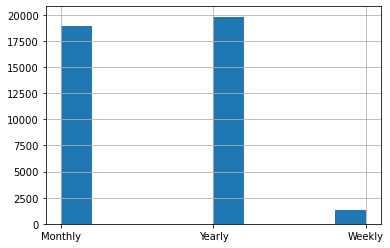

In [19]:
master_data_copy['CompFreq'].hist()

<AxesSubplot:>

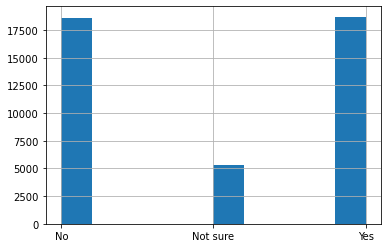

In [20]:
master_data_copy['NEWDevOps'].hist()

<AxesSubplot:>

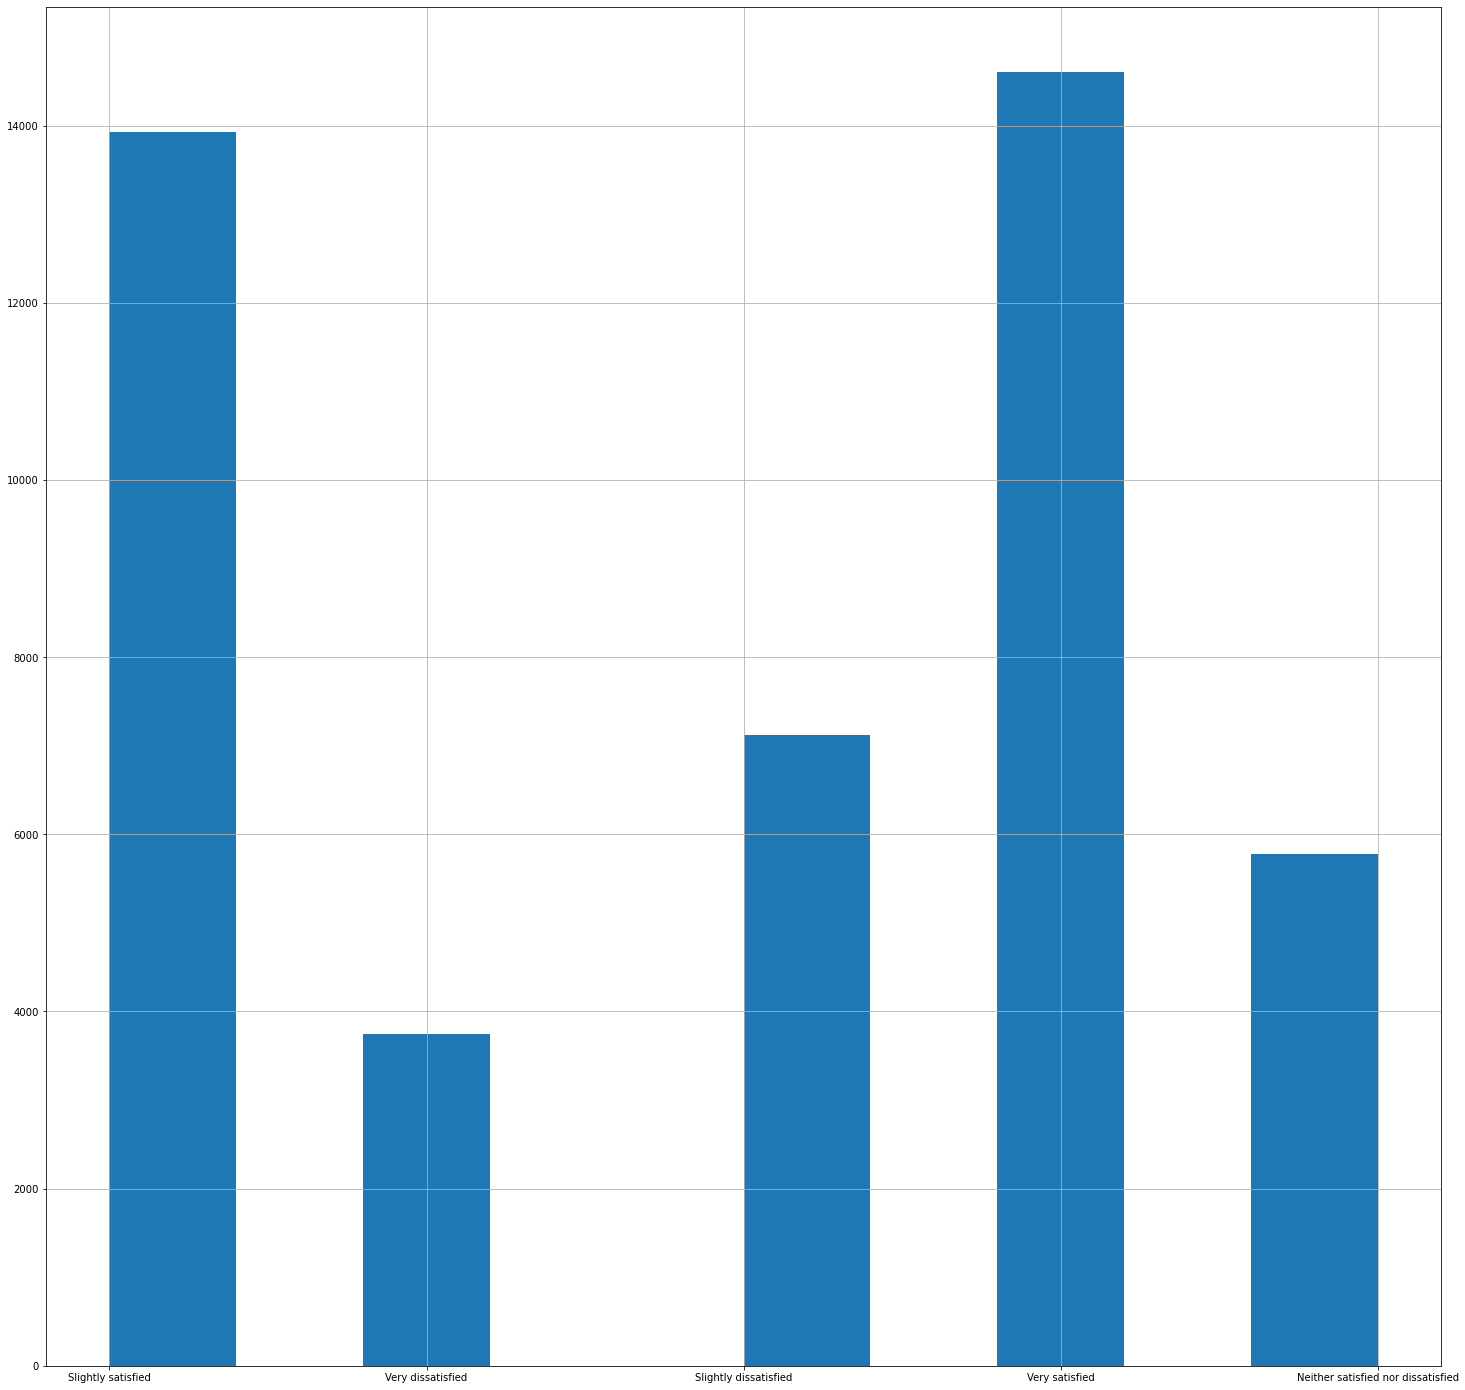

In [21]:
master_data_copy['JobSat'].hist(figsize=(25,25))

In [22]:
master_data_copy['JobSat'].value_counts()

Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: JobSat, dtype: int64

<AxesSubplot:>

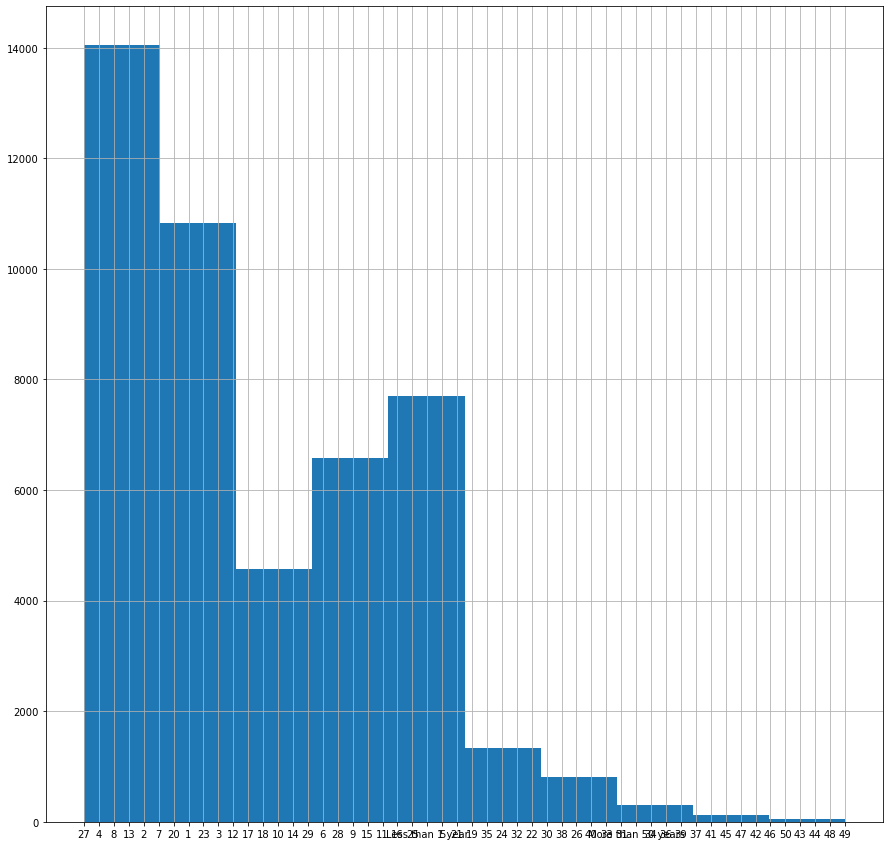

In [23]:
master_data_copy['YearsCodePro'].hist(figsize=(15,15))

In [24]:
master_data_copy['YearsCodePro'].value_counts()

3                     4815
2                     4814
5                     3978
4                     3716
1                     2818
6                     2741
10                    2735
8                     2234
7                     2229
Less than 1 year      2174
15                    1531
12                    1460
20                    1416
9                     1232
11                     947
13                     904
14                     758
16                     624
25                     583
18                     533
17                     475
22                     444
19                     373
30                     370
21                     341
23                     321
24                     259
26                     180
35                     162
27                     149
28                     128
32                     103
40                     101
33                      93
31                      80
34                      79
29                      72
3

In [25]:
master_data_copy['YearsCodePro'].fillna(value=0,inplace=True)

In [26]:
def yearsCodePro(row):
    if(row == 'Less than 1 year'):
        yearsCode = 0
    elif(row == 'More than 50 years'):
        yearsCode = 6
    elif(int(row) >= 1 and int(row) < 5):
        yearsCode = 1
    elif(int(row) >= 5 and int(row) < 10):
        yearsCode = 2
    elif(int(row) >= 10 and int(row) < 15):
        yearsCode = 3
    elif(int(row) >= 15 and int(row) < 25):
        yearsCode = 4
    elif(int(row) >= 25 and int(row) < 40):
        yearsCode = 5
    elif(int(row) == 0):
        yearsCode = 0
    else:
        yearsCode = 6
    return yearsCode

master_data_copy['YearsofCoding'] = master_data_copy['YearsCodePro'].apply(lambda x: yearsCodePro(x))

In [27]:
master_data_copy['YearsofCoding'].value_counts()

0    20286
1    16163
2    12414
3     6804
4     6317
5     2215
6      262
Name: YearsofCoding, dtype: int64

In [28]:
master_data_copy.drop(['YearsCodePro'],axis=1,inplace=True)

In [29]:
master_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64461 entries, 1 to 65112
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hobbyist       64416 non-null  object 
 1   Age            45446 non-null  float64
 2   CompFreq       40069 non-null  object 
 3   DevType        49370 non-null  object 
 4   EdLevel        57431 non-null  object 
 5   Employment     63854 non-null  object 
 6   JobSat         45194 non-null  object 
 7   JobSeek        51727 non-null  object 
 8   NEWDevOps      42686 non-null  object 
 9   NEWLearn       56156 non-null  object 
 10  OpSys          56228 non-null  object 
 11  SOAccount      56805 non-null  object 
 12  Target         64461 non-null  int64  
 13  YearsofCoding  64461 non-null  int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 7.4+ MB


In [30]:
master_data_copy.head()

Hobbyist   Age CompFreq  \
Respondent                           
1               Yes   NaN  Monthly   
2                No   NaN      NaN   
3               Yes   NaN      NaN   
4               Yes  25.0      NaN   
5               Yes  31.0      NaN   

                                                      DevType  \
Respondent                                                      
1           Developer, desktop or enterprise applications;...   
2                     Developer, full-stack;Developer, mobile   
3                                                         NaN   
4                                                         NaN   
5                                                         NaN   

                                                    EdLevel  \
Respondent                                                    
1           Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
2              Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3                                                       NaN   
4           Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
5              Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                                   Employment  \
Respondent                                                      
1           Independent contractor, freelancer, or self-em...   
2                                          Employed full-time   
3                                                         NaN   
4                                                         NaN   
5                                          Employed full-time   

                           JobSat  \
Respondent                          
1              Slightly satisfied   
2               Very dissatisfied   
3                             NaN   
4           Slightly dissatisfied   
5                             NaN   

                                                      JobSeek NEWDevOps  \
Respondent                                                                
1                I am not interested in new job opportunities        No   
2                I am not interested in new job opportunities       NaN   
3                                                         NaN       NaN   
4           I’m not actively looking, but I am open to new...        No   
5                                                         NaN       NaN   

                 NEWLearn        OpSys SOAccount  Target  YearsofCoding  
Respondent                                                               
1             Once a year      Windows        No       1              5  
2             Once a year        MacOS       Yes       1              1  
3           Once a decade  Linux-based       Yes       0              0  
4             Once a year  Linux-based       Yes       1              1  
5             Once a year      Windows       Yes       0              2

<AxesSubplot:>

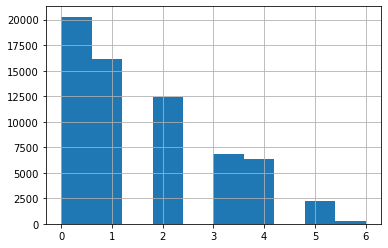

In [31]:
master_data_copy['YearsofCoding'].hist()

In [32]:
master_data_copy['CompFreq'].fillna(value='None',inplace=True)

In [33]:
master_data_copy.drop(['NEWDevOps'],axis=1,inplace=True)

In [34]:
master_data_copy['JobSat'].fillna(value='Neither satisfied nor dissatisfied',inplace=True)

In [35]:
master_data_copy['JobSat'].value_counts()

Neither satisfied nor dissatisfied    25050
Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Very dissatisfied                      3746
Name: JobSat, dtype: int64

<AxesSubplot:>

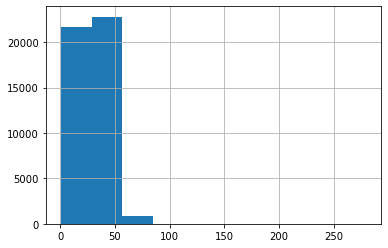

In [36]:
master_data_copy['Age'].hist()

In [37]:
master_data_copy['Age'].value_counts()

25.0    2693
28.0    2412
30.0    2406
26.0    2391
27.0    2338
        ... 
23.8       1
95.0       1
31.5       1
20.5       1
16.5       1
Name: Age, Length: 110, dtype: int64

In [38]:
Q1 = master_data_copy[['Age']].quantile(0.25)
Q3 = master_data_copy[['Age']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age    11.0
dtype: float64


In [39]:
master_data_copy_without_outlier = master_data_copy[~((master_data_copy < (Q1 - 1.5 * IQR)) |(master_data_copy > (Q3 + 1.5 * IQR))).any(axis=1)]

In [40]:
newrows,newcolumns = master_data_copy_without_outlier.shape
custom_rows,custom_columns = master_data_copy.shape
percentage_of_outliers = ((custom_rows-newrows)/custom_rows)*100
print("Percentage of Outliers is {}".format(percentage_of_outliers))

Percentage of Outliers is 2.755154279331689


<AxesSubplot:>

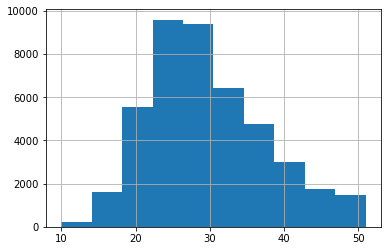

In [41]:
master_data_copy_without_outlier['Age'].hist()

In [42]:
master_data_copy_without_outlier.columns

Index(['Hobbyist', 'Age', 'CompFreq', 'DevType', 'EdLevel', 'Employment',
       'JobSat', 'JobSeek', 'NEWLearn', 'OpSys', 'SOAccount', 'Target',
       'YearsofCoding'],
      dtype='object')

In [43]:
#master_data_copy.drop(['Age'],axis=1,inplace=True)

In [44]:
master_data_copy_without_outlier.shape

(62685, 13)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
vectorizer = TfidfVectorizer(stop_words='english')

In [47]:
master_data_copy['DevType'].fillna(value='None',inplace=True)

In [48]:
vectors = vectorizer.fit_transform(master_data_copy_without_outlier['DevType'].values.astype(str))

In [49]:
feature_names = vectorizer.get_feature_names()

In [50]:
feature_names

['academic',
 'administrator',
 'analyst',
 'applications',
 'business',
 'data',
 'database',
 'designer',
 'desktop',
 'developer',
 'devices',
 'devops',
 'educator',
 'embedded',
 'end',
 'engineer',
 'engineering',
 'enterprise',
 'executive',
 'game',
 'graphics',
 'learning',
 'machine',
 'manager',
 'marketing',
 'mobile',
 'nan',
 'product',
 'professional',
 'qa',
 'reliability',
 'researcher',
 'sales',
 'scientist',
 'senior',
 'site',
 'specialist',
 'stack',
 'test',
 'vp']

In [51]:
dense = vectors.todense()

In [52]:
dense

matrix([[0.        , 0.        , 0.        , ..., 0.32779088, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.42327829, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [53]:
denselist = dense.tolist()

In [54]:
len(denselist)

62685

In [55]:
devTypeData = pd.DataFrame(denselist, columns=feature_names)

In [56]:
devTypeData.tail()

academic  administrator  analyst  applications  business  data  \
62680       0.0            0.0      0.0           0.0       0.0   0.0   
62681       0.0            0.0      0.0           0.0       0.0   0.0   
62682       0.0            0.0      0.0           0.0       0.0   0.0   
62683       0.0            0.0      0.0           0.0       0.0   0.0   
62684       0.0            0.0      0.0           0.0       0.0   0.0   

       database  designer  desktop  developer  ...  reliability  researcher  \
62680       0.0       0.0      0.0        0.0  ...          0.0         0.0   
62681       0.0       0.0      0.0        0.0  ...          0.0         0.0   
62682       0.0       0.0      0.0        0.0  ...          0.0         0.0   
62683       0.0       0.0      0.0        0.0  ...          0.0         0.0   
62684       0.0       0.0      0.0        0.0  ...          0.0         0.0   

       sales  scientist   senior  site  specialist  stack  test       vp  
62680    0.0        0.0  0.57735   0.0         0.0    0.0   0.0  0.57735  
62681    0.0        0.0  0.00000   0.0         0.0    0.0   0.0  0.00000  
62682    0.0        0.0  0.00000   0.0         0.0    0.0   0.0  0.00000  
62683    0.0        0.0  0.00000   0.0         0.0    0.0   0.0  0.00000  
62684    0.0        0.0  0.00000   0.0         0.0    0.0   0.0  0.00000  

[5 rows x 40 columns]

In [57]:
master_data_copy_without_outlier.columns

Index(['Hobbyist', 'Age', 'CompFreq', 'DevType', 'EdLevel', 'Employment',
       'JobSat', 'JobSeek', 'NEWLearn', 'OpSys', 'SOAccount', 'Target',
       'YearsofCoding'],
      dtype='object')

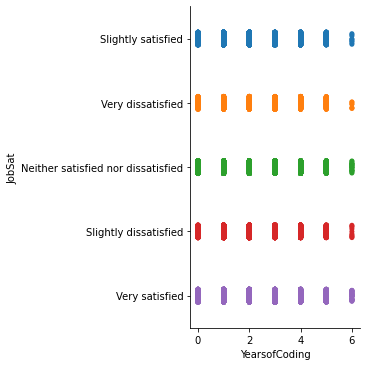

In [58]:
sns.catplot(x="YearsofCoding", y="JobSat", data=master_data_copy_without_outlier)

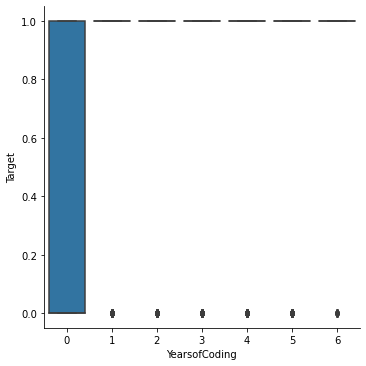

In [59]:
sns.catplot(x="YearsofCoding", y="Target", kind="box", data=master_data_copy_without_outlier)

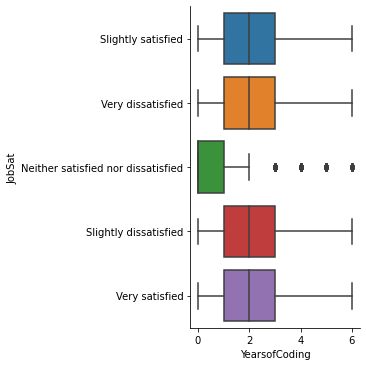

In [60]:
sns.catplot(x="YearsofCoding", y="JobSat", kind="box", data=master_data_copy_without_outlier)

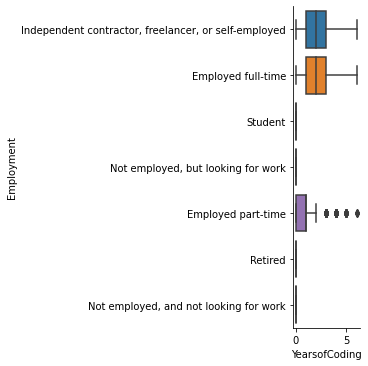

In [61]:
sns.catplot(x="YearsofCoding", y="Employment", kind="box", data=master_data_copy_without_outlier)

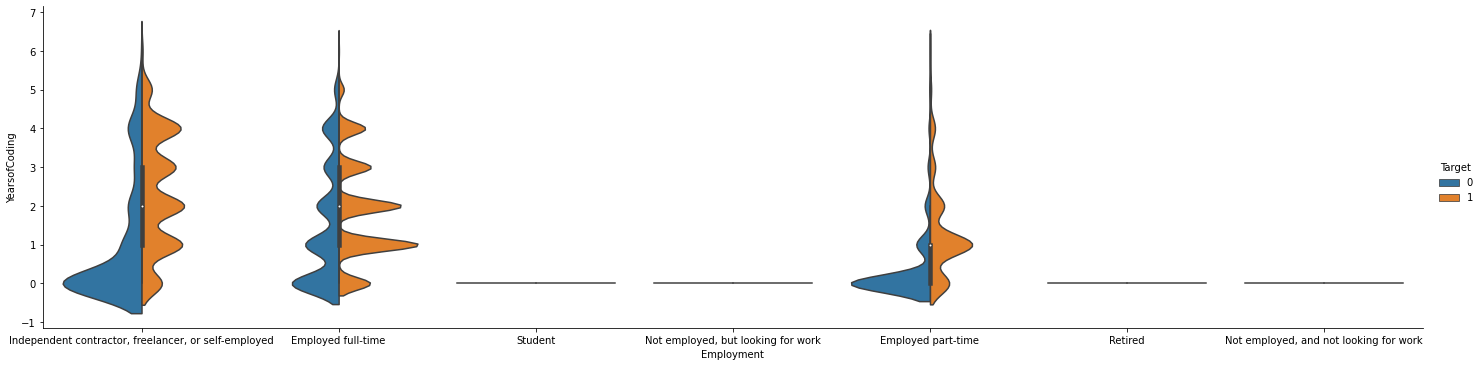

In [69]:
sns.catplot(x="Employment", y="YearsofCoding", hue="Target",kind="violin", data=master_data_copy_without_outlier,split=True,height=5, aspect=4)

In [70]:
master_data_copy_without_outlier.reset_index(drop=True,inplace=True)

In [71]:
newDataSet = pd.concat([master_data_copy_without_outlier,devTypeData],verify_integrity=True,axis=1)

In [72]:
master_data_copy_without_outlier.head()

Hobbyist   Age CompFreq                                            DevType  \
0      Yes   NaN  Monthly  Developer, desktop or enterprise applications;...   
1       No   NaN     None            Developer, full-stack;Developer, mobile   
2      Yes   NaN     None                                                NaN   
3      Yes  25.0     None                                                NaN   
4      Yes  31.0     None                                                NaN   

                                           EdLevel  \
0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2                                              NaN   
3  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                          Employment  \
0  Independent contractor, freelancer, or self-em...   
1                                 Employed full-time   
2                                                NaN   
3                                                NaN   
4                                 Employed full-time   

                               JobSat  \
0                  Slightly satisfied   
1                   Very dissatisfied   
2  Neither satisfied nor dissatisfied   
3               Slightly dissatisfied   
4  Neither satisfied nor dissatisfied   

                                             JobSeek       NEWLearn  \
0       I am not interested in new job opportunities    Once a year   
1       I am not interested in new job opportunities    Once a year   
2                                                NaN  Once a decade   
3  I’m not actively looking, but I am open to new...    Once a year   
4                                                NaN    Once a year   

         OpSys SOAccount  Target  YearsofCoding  
0      Windows        No       1              5  
1        MacOS       Yes       1              1  
2  Linux-based       Yes       0              0  
3  Linux-based       Yes       1              1  
4      Windows       Yes       0              2

In [73]:
newDataSet.shape

(62685, 53)

In [74]:
newDataSet.head()

Hobbyist   Age CompFreq                                            DevType  \
0      Yes   NaN  Monthly  Developer, desktop or enterprise applications;...   
1       No   NaN     None            Developer, full-stack;Developer, mobile   
2      Yes   NaN     None                                                NaN   
3      Yes  25.0     None                                                NaN   
4      Yes  31.0     None                                                NaN   

                                           EdLevel  \
0  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2                                              NaN   
3  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                          Employment  \
0  Independent contractor, freelancer, or self-em...   
1                                 Employed full-time   
2                                                NaN   
3                                                NaN   
4                                 Employed full-time   

                               JobSat  \
0                  Slightly satisfied   
1                   Very dissatisfied   
2  Neither satisfied nor dissatisfied   
3               Slightly dissatisfied   
4  Neither satisfied nor dissatisfied   

                                             JobSeek       NEWLearn  \
0       I am not interested in new job opportunities    Once a year   
1       I am not interested in new job opportunities    Once a year   
2                                                NaN  Once a decade   
3  I’m not actively looking, but I am open to new...    Once a year   
4                                                NaN    Once a year   

         OpSys  ... reliability  researcher  sales  scientist  senior  site  \
0      Windows  ...         0.0         0.0    0.0        0.0     0.0   0.0   
1        MacOS  ...         0.0         0.0    0.0        0.0     0.0   0.0   
2  Linux-based  ...         0.0         0.0    0.0        0.0     0.0   0.0   
3  Linux-based  ...         0.0         0.0    0.0        0.0     0.0   0.0   
4      Windows  ...         0.0         0.0    0.0        0.0     0.0   0.0   

   specialist     stack  test   vp  
0         0.0  0.327791   0.0  0.0  
1         0.0  0.423278   0.0  0.0  
2         0.0  0.000000   0.0  0.0  
3         0.0  0.000000   0.0  0.0  
4         0.0  0.000000   0.0  0.0  

[5 rows x 53 columns]

In [75]:
newDataSet.tail()

Hobbyist  Age CompFreq              DevType  \
62680      Yes  NaN     None  Senior executive/VP   
62681      Yes  NaN     None                  NaN   
62682      Yes  NaN     None                  NaN   
62683      Yes  NaN     None                  NaN   
62684      Yes  NaN     None                  NaN   

                                               EdLevel          Employment  \
62680  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  Employed full-time   
62681                                              NaN  Employed full-time   
62682                        Primary/elementary school                 NaN   
62683                                              NaN  Employed full-time   
62684       Other doctoral degree (Ph.D., Ed.D., etc.)  Employed full-time   

                                   JobSat JobSeek       NEWLearn    OpSys  \
62680  Neither satisfied nor dissatisfied     NaN  Once a decade  Windows   
62681  Neither satisfied nor dissatisfied     NaN            NaN      NaN   
62682  Neither satisfied nor dissatisfied     NaN            NaN      NaN   
62683  Neither satisfied nor dissatisfied     NaN    Once a year  Windows   
62684  Neither satisfied nor dissatisfied     NaN    Once a year  Windows   

       ... reliability  researcher  sales  scientist   senior  site  \
62680  ...         0.0         0.0    0.0        0.0  0.57735   0.0   
62681  ...         0.0         0.0    0.0        0.0  0.00000   0.0   
62682  ...         0.0         0.0    0.0        0.0  0.00000   0.0   
62683  ...         0.0         0.0    0.0        0.0  0.00000   0.0   
62684  ...         0.0         0.0    0.0        0.0  0.00000   0.0   

       specialist  stack  test       vp  
62680         0.0    0.0   0.0  0.57735  
62681         0.0    0.0   0.0  0.00000  
62682         0.0    0.0   0.0  0.00000  
62683         0.0    0.0   0.0  0.00000  
62684         0.0    0.0   0.0  0.00000  

[5 rows x 53 columns]

In [76]:
round(newDataSet['Age'].mean())

30

In [77]:
newDataSet['Age'].fillna(value=round(newDataSet['Age'].mean()),inplace=True)

In [78]:
newDataSet['Hobbyist'].value_counts()

Yes    49117
No     13523
Name: Hobbyist, dtype: int64

In [79]:
49117+13523

62640

In [80]:
newDataSet.shape

(62685, 53)

In [81]:
newDataSet['Hobbyist'].fillna(method='ffill',inplace=True)

In [82]:
newDataSet['JobSeek'].value_counts()

I’m not actively looking, but I am open to new opportunities    28981
I am not interested in new job opportunities                    12473
I am actively looking for a job                                  8784
Name: JobSeek, dtype: int64

In [83]:
newDataSet['JobSeek'].fillna(value='None',inplace=True)

In [84]:
newDataSet['NEWLearn'].value_counts()

Every few months        20618
Once a year             20265
Once every few years    12505
Once a decade            1099
Name: NEWLearn, dtype: int64

In [85]:
newDataSet['NEWLearn'].fillna(value='None',inplace=True)

In [86]:
#master_data_copy.drop(['NEWLearn'],axis=1,inplace=True)

In [87]:
newDataSet.drop(['OpSys'],axis=1,inplace=True)

In [88]:
for colNa in ['Employment','SOAccount','EdLevel']:
    print(newDataSet[colNa].value_counts())

Employed full-time                                      44200
Student                                                  7773
Independent contractor, freelancer, or self-employed     5266
Not employed, but looking for work                       2279
Employed part-time                                       2177
Not employed, and not looking for work                    293
Retired                                                    98
Name: Employment, dtype: int64
Yes                        45902
No                          5938
Not sure/can't remember     3258
Name: SOAccount, dtype: int64
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          25923
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       12645
Some college/university study without earning a degree                                 6956
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4703
Associate degree (A.A., A.S., etc.)   

In [89]:
newDataSet['EdLevel'].fillna(value='No Data',inplace=True)

In [90]:
newDataSet['SOAccount'].fillna(value='Not sure/can\'t remember',inplace=True)

In [91]:
total = newDataSet.isnull().sum().sort_values(ascending=False)
percent = ((newDataSet.isnull().sum()/newDataSet.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(len(newDataSet.columns)))

               Total    Percent
DevType        14823  23.646805
Employment       599   0.955572
vp                 0   0.000000
administrator      0   0.000000
devops             0   0.000000
devices            0   0.000000
developer          0   0.000000
desktop            0   0.000000
designer           0   0.000000
database           0   0.000000
data               0   0.000000
business           0   0.000000
applications       0   0.000000
analyst            0   0.000000
academic           0   0.000000
test               0   0.000000
YearsofCoding      0   0.000000
Target             0   0.000000
SOAccount          0   0.000000
NEWLearn           0   0.000000
JobSeek            0   0.000000
JobSat             0   0.000000
EdLevel            0   0.000000
CompFreq           0   0.000000
Age                0   0.000000
educator           0   0.000000
embedded           0   0.000000
end                0   0.000000
product            0   0.000000
stack              0   0.000000
speciali

In [92]:
newDataSet['Employment'].fillna(value='No Data',inplace=True)

In [93]:
def employedDataChange(row):
    notADev = 0
    if row != 'Employed full-time':
        notADev = 1
    return notADev
newDataSet['EmploymentNew'] = newDataSet['Employment'].apply(lambda x : employedDataChange(x))

In [94]:
newDataSet.drop(['Employment','DevType'],axis=1,inplace=True)

In [95]:
newDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62685 entries, 0 to 62684
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hobbyist       62685 non-null  object 
 1   Age            62685 non-null  float64
 2   CompFreq       62685 non-null  object 
 3   EdLevel        62685 non-null  object 
 4   JobSat         62685 non-null  object 
 5   JobSeek        62685 non-null  object 
 6   NEWLearn       62685 non-null  object 
 7   SOAccount      62685 non-null  object 
 8   Target         62685 non-null  int64  
 9   YearsofCoding  62685 non-null  int64  
 10  academic       62685 non-null  float64
 11  administrator  62685 non-null  float64
 12  analyst        62685 non-null  float64
 13  applications   62685 non-null  float64
 14  business       62685 non-null  float64
 15  data           62685 non-null  float64
 16  database       62685 non-null  float64
 17  designer       62685 non-null  float64
 18  deskto

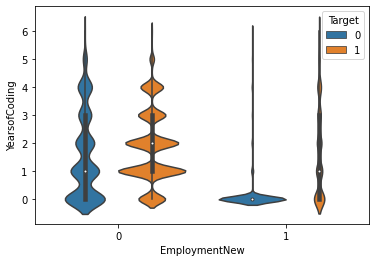

In [97]:
_ = sns.violinplot(x='EmploymentNew',y='YearsofCoding',hue='Target',data=newDataSet,dodge=True)

In [99]:
newDataSet['Target'].value_counts()

1    45964
0    16721
Name: Target, dtype: int64

In [101]:
newDataSet['YearsofCoding'].value_counts()

0    19964
1    16130
2    12372
3     6759
4     6064
5     1311
6       85
Name: YearsofCoding, dtype: int64

<AxesSubplot:>

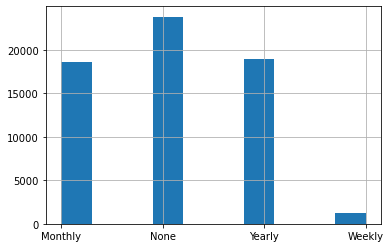

In [102]:
newDataSet['CompFreq'].hist()

<AxesSubplot:>

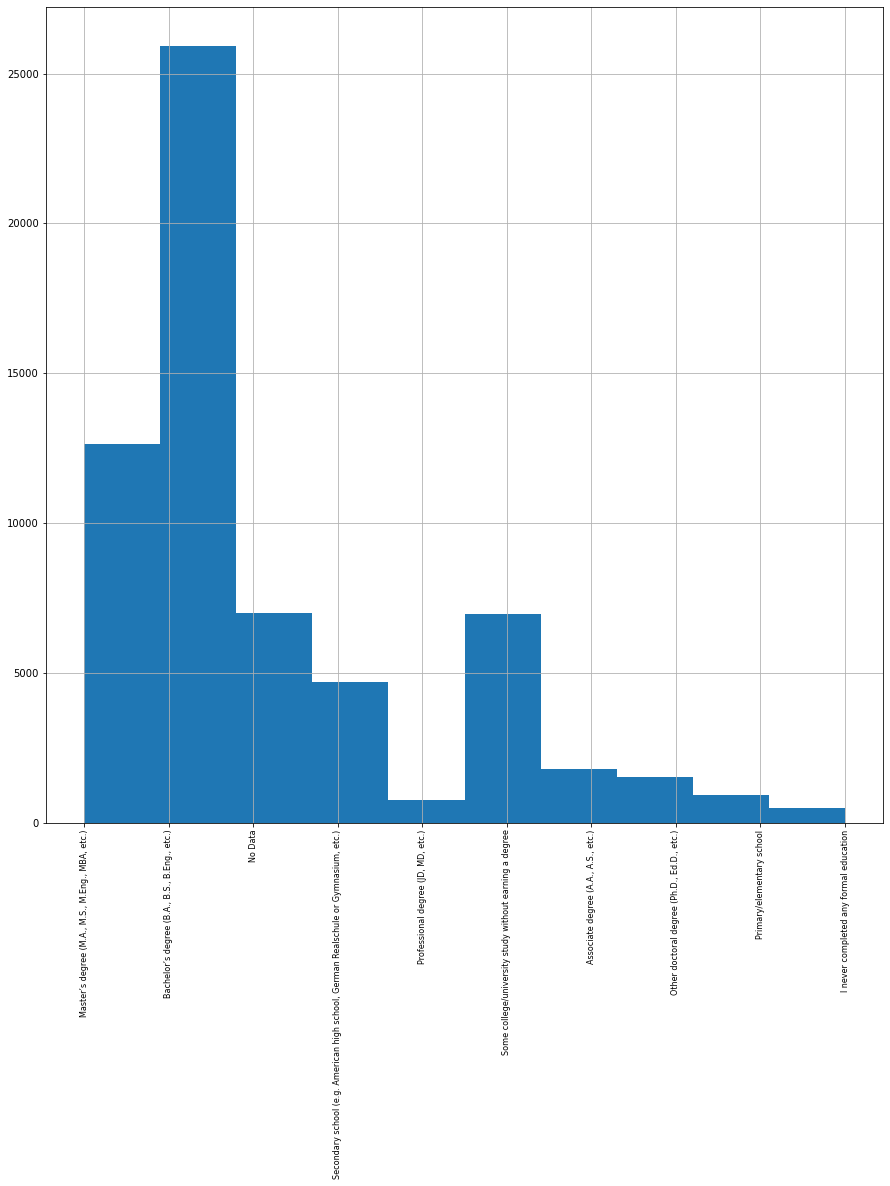

In [111]:
newDataSet['EdLevel'].hist(figsize=(15,15),xlabelsize=8,xrot=90)

<AxesSubplot:>

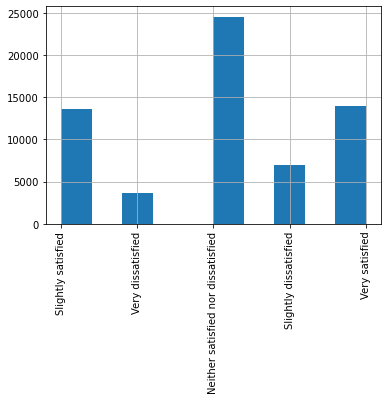

In [113]:
newDataSet['JobSat'].hist(xrot=90)

In [114]:
encodedDataFrame = pd.get_dummies(newDataSet,columns=['JobSat','SOAccount','EdLevel','JobSeek','CompFreq','NEWLearn','Hobbyist'],drop_first=True)

In [115]:
encodedDataFrame.select_dtypes(include='object')

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[62685 rows x 0 columns]

<AxesSubplot:>

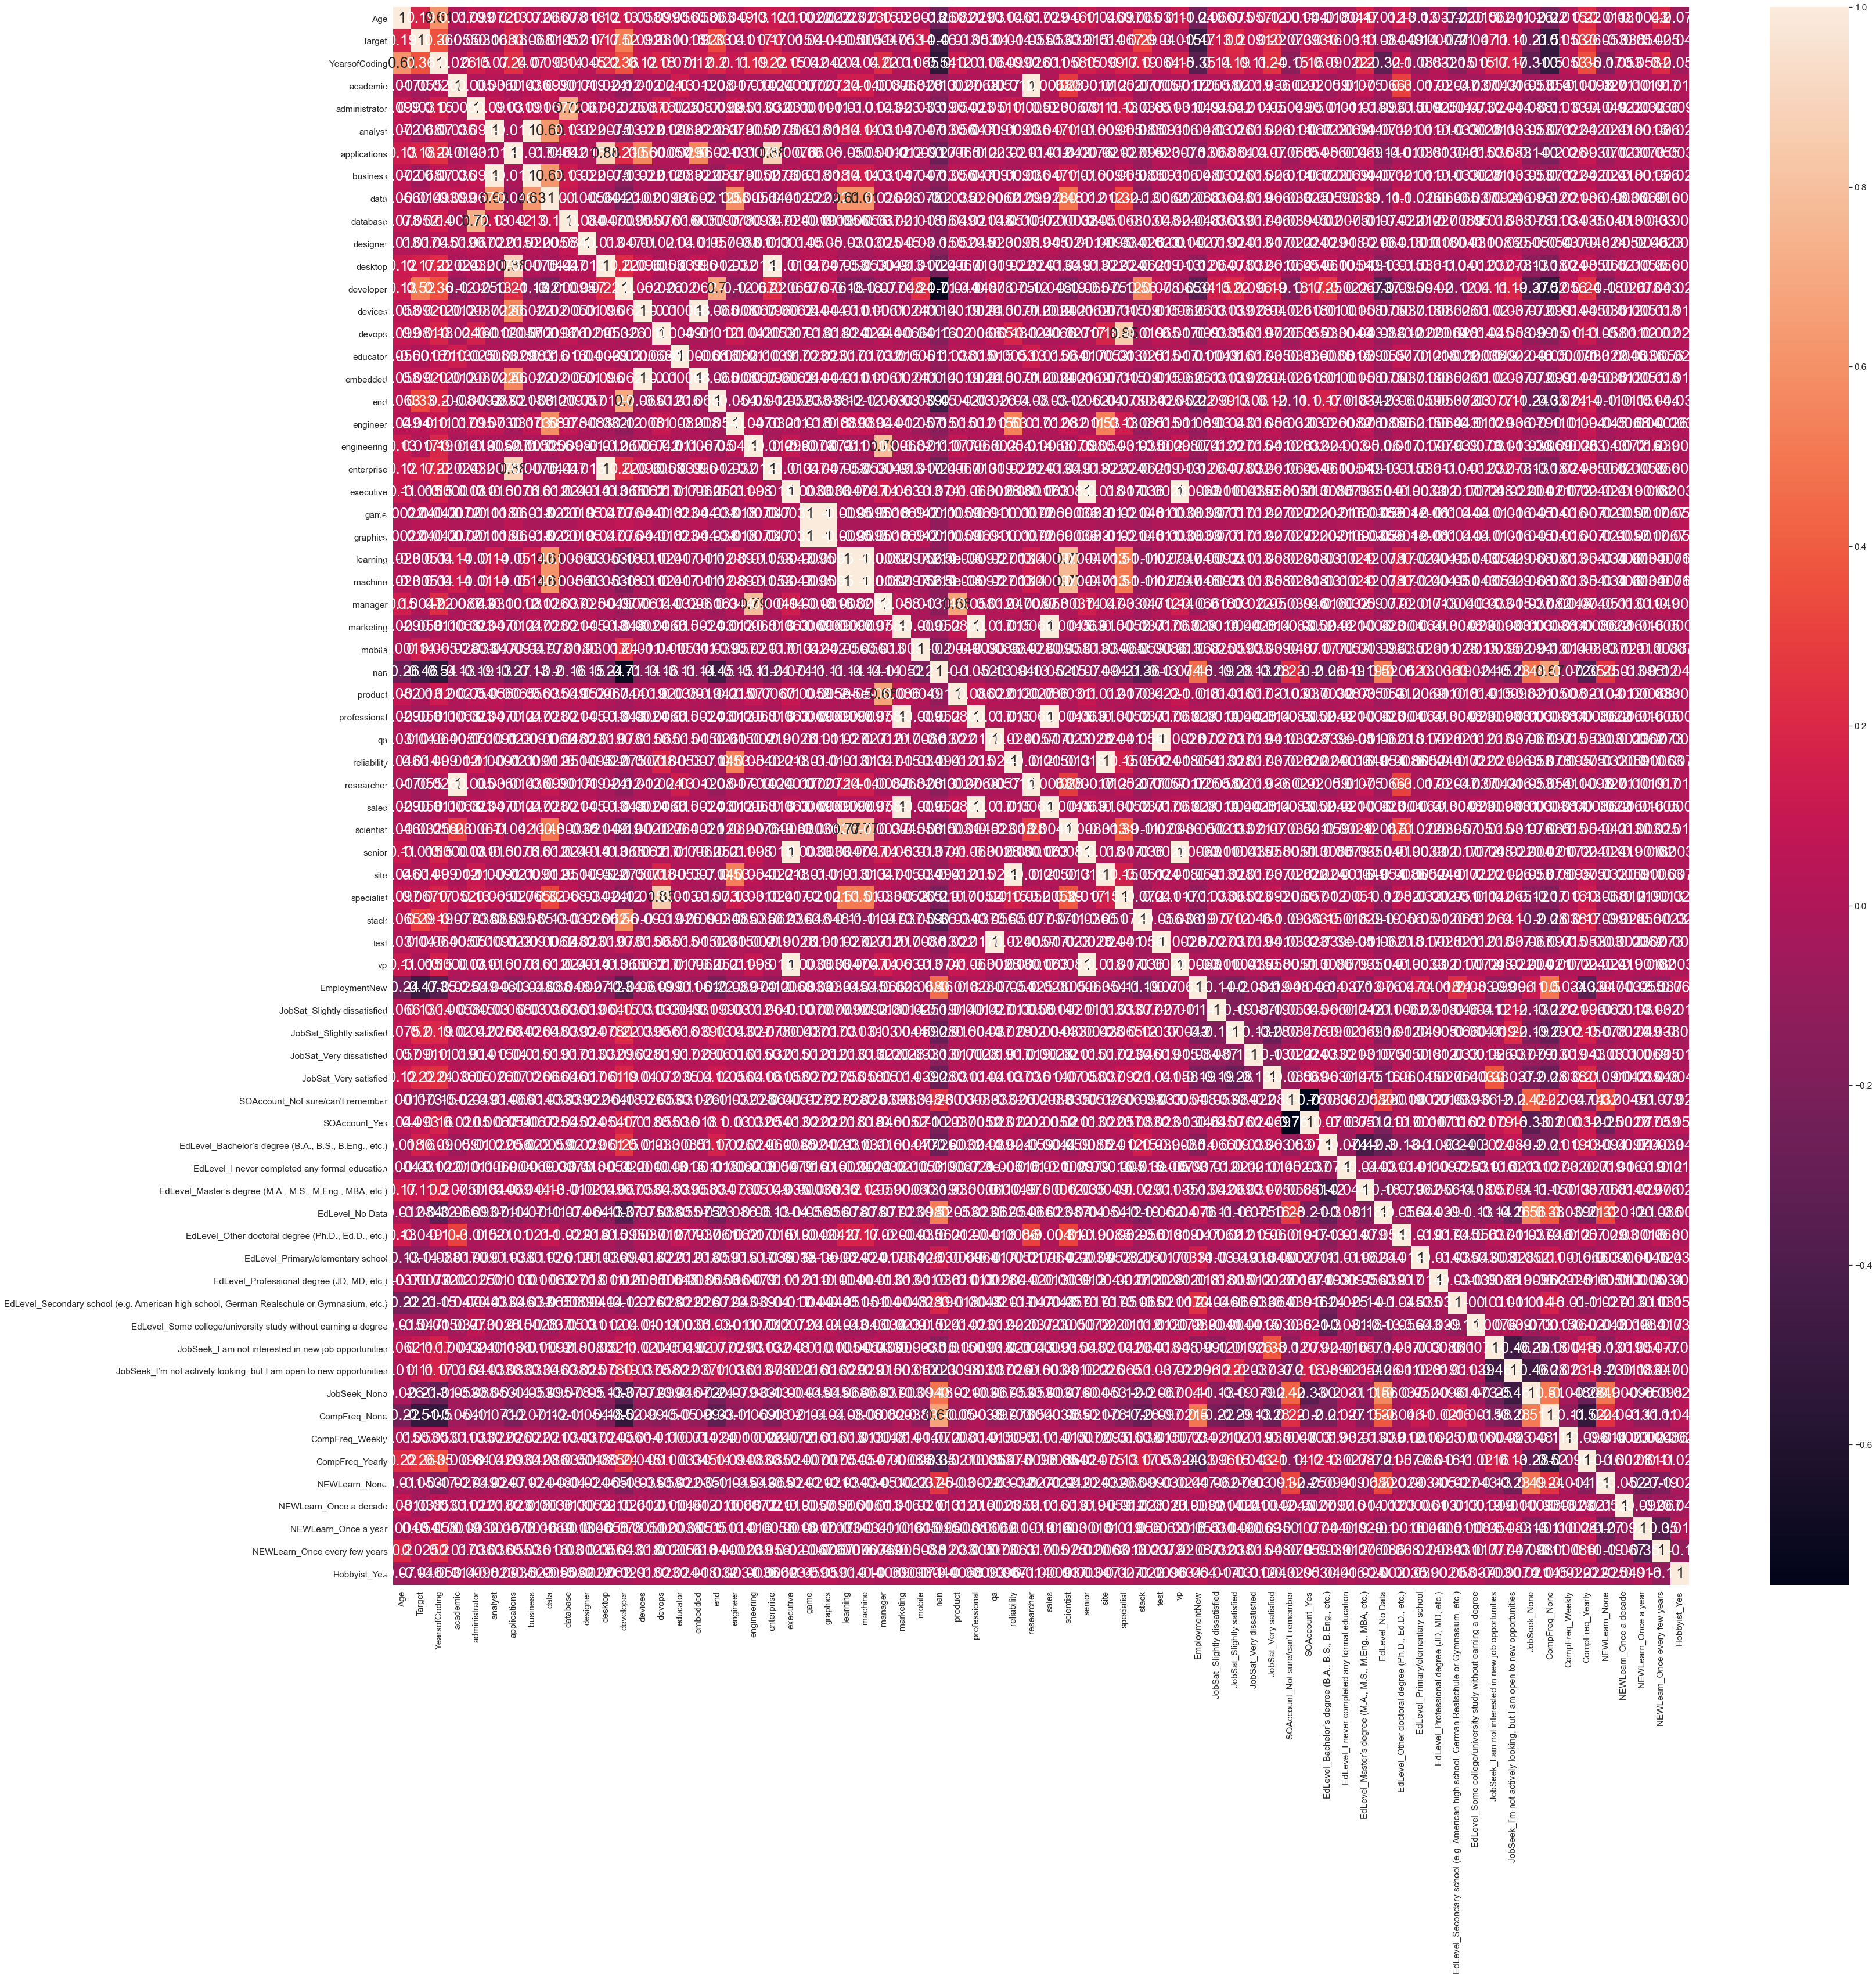

In [116]:
# Now we will plot a heat map to see how each feature is correlated with one another
sns.set(font_scale=1.4)
plt.figure(figsize=(50,50))
sns.heatmap(encodedDataFrame.corr(),annot=True,annot_kws={"size": 26})

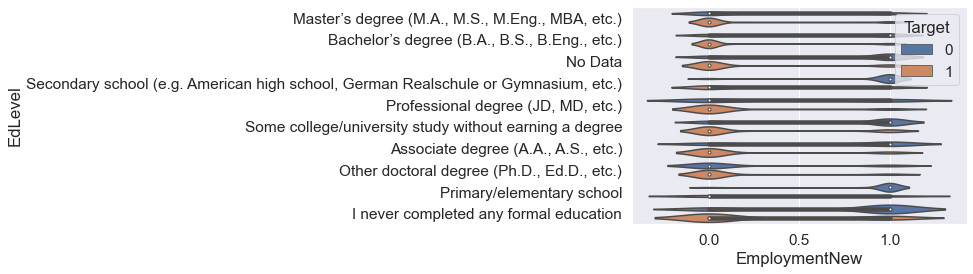

In [117]:
_ = sns.violinplot(x='EmploymentNew',y='EdLevel',hue='Target',data=newDataSet,dodge=True)

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
inputData = encodedDataFrame.drop(['Target'],axis=1)
oututData = encodedDataFrame['Target']

In [120]:
logreg = LogisticRegression(penalty='l2',C=1.0,solver='lbfgs')

In [121]:
from sklearn.model_selection import train_test_split

In [127]:
from sklearn import preprocessing

In [128]:
scaler = preprocessing.StandardScaler().fit(inputData)

In [129]:
scaler.mean_

array([2.97936667e+01, 1.47518545e+00, 2.19890025e-02, 5.21285829e-02,
       2.12787191e-02, 6.88340067e-02, 2.12787191e-02, 5.11301322e-02,
       2.84373876e-02, 3.31665186e-02, 5.44649479e-02, 3.45098542e-01,
       2.49166785e-02, 3.52345002e-02, 1.99482330e-02, 2.49166785e-02,
       1.97955199e-01, 3.02006107e-02, 1.76441983e-02, 5.44649479e-02,
       7.17829762e-03, 1.69963668e-02, 1.69963668e-02, 2.04905735e-02,
       2.04905735e-02, 2.79765354e-02, 3.65387549e-03, 6.22942787e-02,
       2.36468055e-01, 1.45899991e-02, 3.65387549e-03, 2.26774410e-02,
       1.17181695e-02, 2.19890025e-02, 3.65387549e-03, 3.06589657e-02,
       7.17829762e-03, 1.17181695e-02, 4.63666195e-02, 1.47287224e-01,
       2.26774410e-02, 7.17829762e-03, 2.94887134e-01, 1.10776103e-01,
       2.16766372e-01, 5.77969211e-02, 2.22716758e-01, 1.73007897e-01,
       7.32264497e-01, 4.13543910e-01, 7.70519263e-03, 2.01722900e-01,
       1.11478025e-01, 2.43279892e-02, 1.49158491e-02, 1.20603015e-02,
      

In [130]:
inputData_scaled = scaler.transform(inputData)

In [131]:
xTrain,xTest,yTrain,yTest = train_test_split(inputData_scaled,oututData,test_size=0.2,random_state=67)

In [132]:
logreg.fit(xTrain,yTrain)

LogisticRegression()

In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
import warnings
warnings.filterwarnings('ignore')

In [135]:
logis_params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],'C':[0.01,0.1,1,10],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
logist_grid = LogisticRegression()
gcv_log = GridSearchCV(logist_grid,logis_params)
gcv_log.fit(xTrain,yTrain)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [136]:
print("Best Score:" + str(gcv_log.best_score_))
print("Best Parameters: " + str(gcv_log.best_params_))

Best Score:0.8685690043241499
Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [137]:
logRegMain = LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [138]:
logRegMain.fit(xTrain,yTrain)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [139]:
yPredictedOne = logRegMain.predict(xTest)

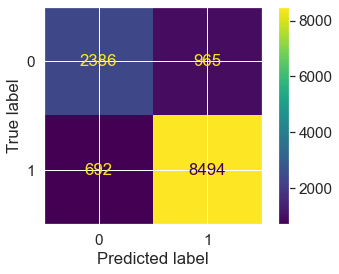

In [140]:
from sklearn.metrics import plot_confusion_matrix
disp_gfc = plot_confusion_matrix(logRegMain,xTest,yTest)
plt.show()

In [141]:
from sklearn.metrics import classification_report

In [142]:
print(classification_report(yTest,yPredictedOne))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      3351
           1       0.90      0.92      0.91      9186

    accuracy                           0.87     12537
   macro avg       0.84      0.82      0.83     12537
weighted avg       0.87      0.87      0.87     12537



In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [145]:
rfc_params = {'n_estimators': [1,3,10,30,100],'criterion':['gini', 'entropy'],'max_depth':[2,3,5]}
rfc_grid = RandomForestClassifier()
gcv_rfc = GridSearchCV(rfc_grid,rfc_params)
gcv_rfc.fit(xTrain,yTrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [1, 3, 10, 30, 100]})

In [146]:
print("Best Score:" + str(gcv_rfc.best_score_))
print("Best Parameters: " + str(gcv_rfc.best_params_))

Best Score:0.8672927393907617
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 10}


In [147]:
rfcMain = RandomForestClassifier(criterion='gini',max_depth=5,n_estimators=10)

In [148]:
rfcMain.fit(xTrain,yTrain)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [149]:
rfcYPredicted = rfcMain.predict(xTest)

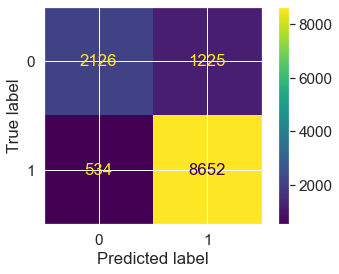

In [150]:
disp_gfc = plot_confusion_matrix(rfcMain,xTest,yTest)
plt.show()

In [151]:
print(classification_report(yTest,rfcYPredicted))

              precision    recall  f1-score   support

           0       0.80      0.63      0.71      3351
           1       0.88      0.94      0.91      9186

    accuracy                           0.86     12537
   macro avg       0.84      0.79      0.81     12537
weighted avg       0.86      0.86      0.85     12537



In [ ]:
gfc_params = {'loss': ['deviance', 'exponential'],'learning_rate':[0.01,0.1,1,10],'n_estimators': [1,3,10,30],'criterion':['friedman_mse', 'mse', 'mae']}
gfc_grid = GradientBoostingClassifier()
gcv_gfc = GridSearchCV(gfc_grid,gfc_params,cv=3)
gcv_gfc.fit(xTrain,yTrain)

In [ ]:
print("Best Score:" + str(gcv_gfc.best_score_))
print("Best Parameters: " + str(gcv_gfc.best_params_))